# Heart Failure Prediction

- Goal: Create a model for predicting mortality caused by Heart Failure

- **age**
- **anaemia**: Decrease of red blood cells or hemoglobin (0: Normal, 1: Anaemia)
- **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
- **diabetes**: If the patient has diabetes (0: No, 1: Yes)
- **ejection_fraction**: Percentage of blood leaving the heart at each contraction (%)
- **high_blood_pressure**: If the patient has hypertension (0: No, 1: Yes)
- **platelets**: Platelets in the blood (kiloplatelets/mL)
- **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
- **serum_sodium**: Level of serum sodium in the blood (mEq/L)
- **sex**: (0: Female, 1: Male)
- **smoking**: (0: Smoker, 1: Non-Smoker)
- **time**: (Day)
- **DEATH_EVENT**: Target Variable (0: Alive, 1: Dead)

### Simple Explaination for some of medical variables
- **anaemia**: A lowered ability of the blood to carry oxygen. When anemia comes on slowly, the symptoms are often vague and may include feeling tired, weakness, shortness of breath, and a poor ability to exercise
- **creatine phosphokinase (CPK)**: When the total CPK level is very high, it most often means there has been injury or stress to muscle tissue, the heart, or the brain. Finding which specific form of CPK is high helps determine which tissue has been damaged
    - Normal CPK Level: 10-120
- **ejection fraction**: An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat
- **platelets**: Platelets are made in our bone marrow, the sponge-like tissue inside our bones. Bone marrow contains stem cells that develop into red blood cells, white blood cells, and platelets
    - Normal platelet count: 150,000 - 450,000 platelets per microliter of blood
    - Having more than 450,000 platelets is a condition called thrombocytosis
    - Having less than 150,000 platelets is known as thrombocytopenia
- **serum creatinine**: Elevated creatinine level signifies impaired kidney function or kidney disease. As the kidneys become impaired for any reason, the creatinine level in the blood will rise due to poor clearance of creatinine by the kidneys. Abnormally high levels of creatinie thus warn of possible malfunction or failure of the kidneys
    - For adult men: 0.74 - 1.35
    - For adult women: 0.59 - 1.04
- **serum sodium**: Low blood sodium in older adults, especially those who are hospitalized or living in long-term care facilities. Signs and symptoms of hyponatremia can include altered personality, lethargy and confusion. On the other hands, high blood sodidum causes thirst, can lead to confusion, muscle twithcing, seizures, coma, and death

In [226]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data

In [227]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [229]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [230]:
df.duplicated().value_counts()

False    299
dtype: int64

In [231]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## EDA

### Age

Text(0.5, 1.0, 'Age and Death')

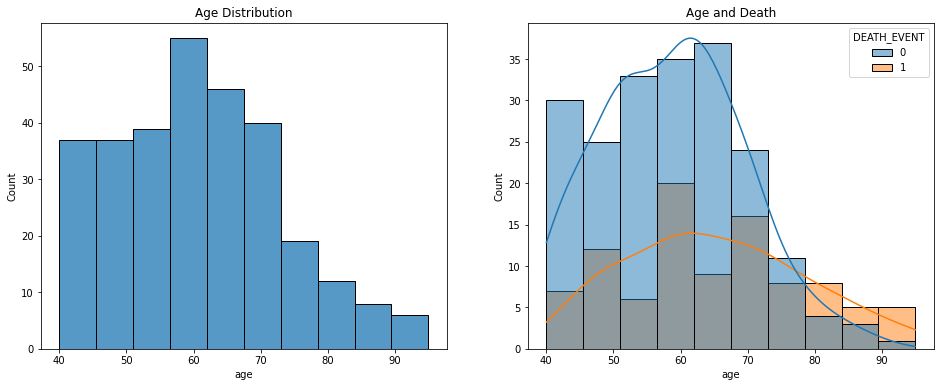

In [232]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

age_ = sns.histplot(ax=axes[0], x='age', data=df)
age_.set_title('Age Distribution')

age_death = sns.histplot(ax=axes[1], x='age', hue='DEATH_EVENT', data=df, kde=True)
age_death.set_title('Age and Death')

### CPK

In [233]:
cpk_3000 = df.loc[df['creatinine_phosphokinase'] < 3000][['creatinine_phosphokinase', 'DEATH_EVENT']]

Text(0.5, 1.0, 'CPK & Death')

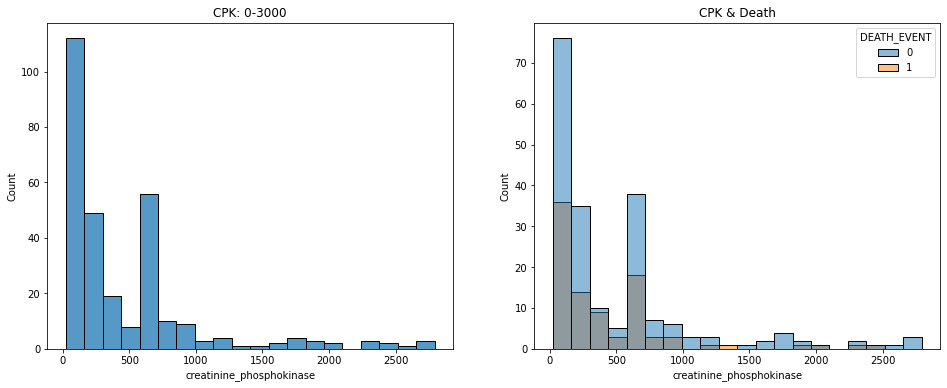

In [234]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cpk_3000_ = sns.histplot(ax=axes[0], x='creatinine_phosphokinase', data=cpk_3000)
cpk_3000_.set_title('CPK: 0-3000')

cpk_3000_death = sns.histplot(ax=axes[1], x='creatinine_phosphokinase', hue='DEATH_EVENT', data=cpk_3000)
cpk_3000_death.set_title('CPK & Death')

### Eject Fraction

Text(0.5, 1.0, 'Violinplot')

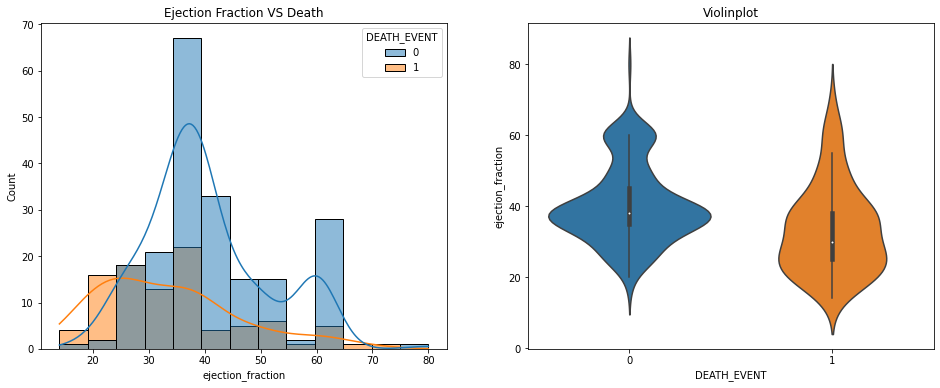

In [235]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ef_death = sns.histplot(ax=axes[0], x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT', kde=True)
ef_death.set_title('Ejection Fraction VS Death')

ef_death_vio = sns.violinplot(ax=axes[1], x='DEATH_EVENT', y='ejection_fraction', data=df)
ef_death_vio.set_title('Violinplot')

### Platelets

Text(0.5, 1.0, 'Platelets & Death')

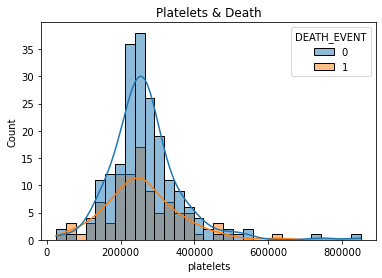

In [236]:
pla_death = sns.histplot(x='platelets', data=df, hue='DEATH_EVENT', kde=True)
pla_death.set_title('Platelets & Death')

It seems that Platelets doesn't explain much about the death event

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

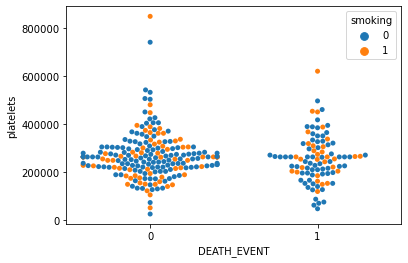

In [237]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

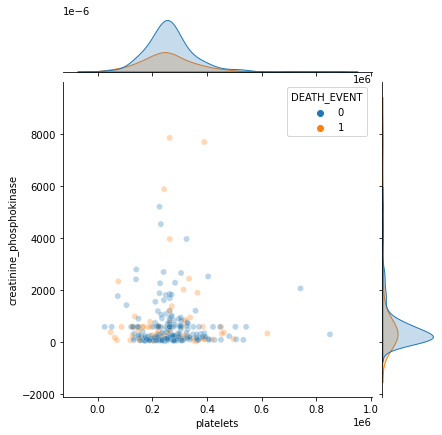

In [238]:
pla_cpk = sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)

## Time

<AxesSubplot:xlabel='time', ylabel='Count'>

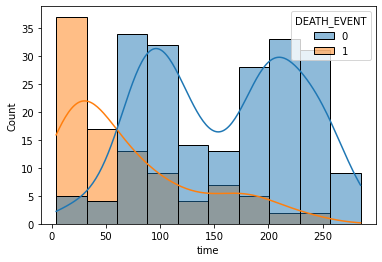

In [239]:
sns.histplot(x='time', hue='DEATH_EVENT', data=df, kde=True)

## Data Preprocessing

In [240]:
from sklearn.preprocessing import StandardScaler

In [241]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [242]:
X_num = df[['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium','time']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [243]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num) # Becomes array
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

In [244]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0


## Train/Test Split

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

In [247]:
from sklearn.linear_model import LogisticRegression

In [248]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [249]:
from sklearn.metrics import classification_report, plot_precision_recall_curve, plot_roc_curve

In [250]:
pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.76      0.62      0.68        26

    accuracy                           0.83        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.83      0.83      0.83        90



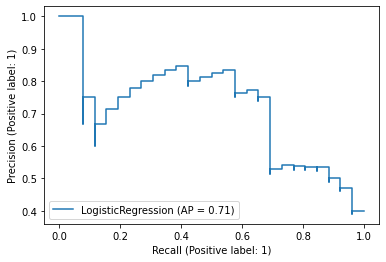

In [251]:
plot_precision_recall_curve(model_lr, X_test, y_test)

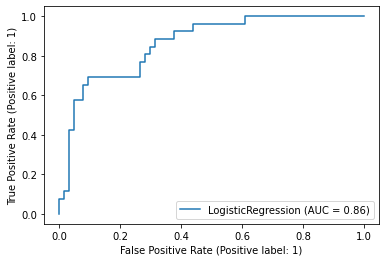

In [252]:
plot_roc_curve(model_lr, X_test, y_test)

## XGBoost

In [253]:
# !pip3 install xgboost

In [254]:
from xgboost import XGBClassifier

In [255]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

[13:40:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [256]:
pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.79      0.88      0.84        26

    accuracy                           0.90        90
   macro avg       0.87      0.90      0.88        90
weighted avg       0.91      0.90      0.90        90



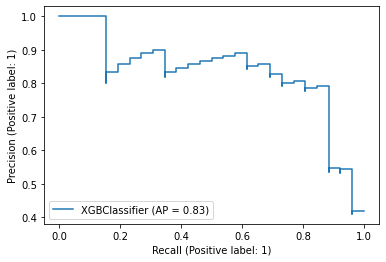

In [257]:
plot_precision_recall_curve(model_xgb, X_test, y_test)

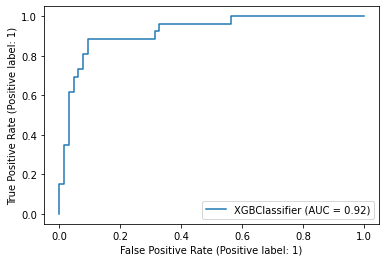

In [258]:
plot_roc_curve(model_xgb, X_test, y_test)

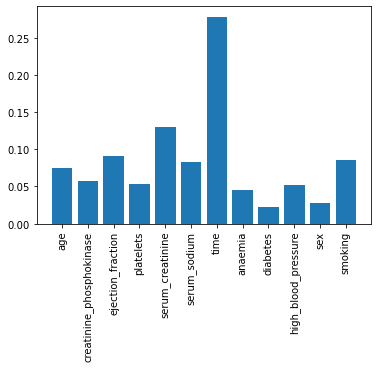

In [259]:
# feature importances
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Omit Time Variable

In [260]:
X_num_ = df[['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium']]

X_scaled_ = scaler.fit_transform(X_num_)
X_scaled_ = pd.DataFrame(data=X_scaled_, index=X_num_.index, columns=X_num_.columns)
X_ = pd.concat([X_scaled_, X_cat], axis=1)

In [261]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y, test_size=0.3, random_state=1)

In [262]:
model_lr_ = LogisticRegression(max_iter=1000)
model_lr_.fit(X_train_, y_train_)

LogisticRegression(max_iter=1000)

In [263]:
pred_lr_ = model_lr_.predict(X_test_)
print(classification_report(y_test_, pred_lr_))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



In [264]:
model_xgb_ = XGBClassifier()
model_xgb_.fit(X_train_, y_train_)

[13:40:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [265]:
pred_xgb_ = model_xgb_.predict(X_test_)
print(classification_report(y_test_, pred_xgb_))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.62      0.50      0.55        26

    accuracy                           0.77        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.76      0.77      0.76        90



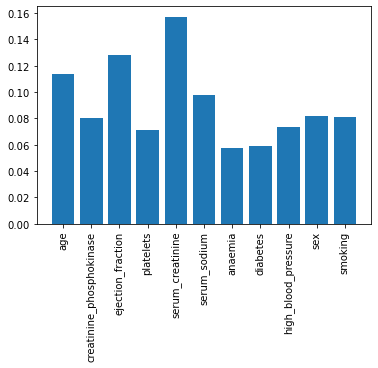

In [266]:
plt.bar(X_.columns, model_xgb_.feature_importances_)
plt.xticks(rotation=90)
plt.show()

- Serum Creatinine and Ejection fraction contribute the most for death event prediction

## Serum Creatinine and Ejection fraction

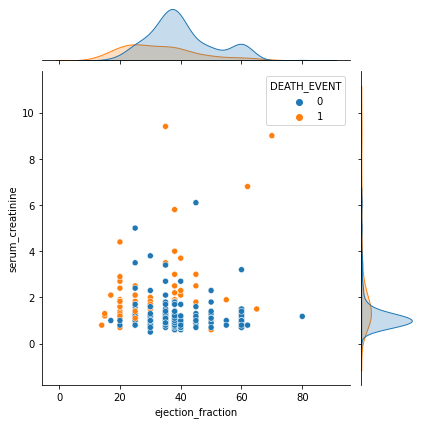

In [267]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine',data=df, hue='DEATH_EVENT')

## PR Curve

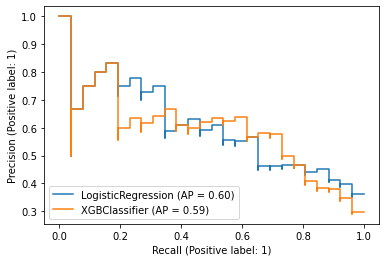

In [268]:
fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr_, X_test_, y_test_, ax=ax)
plot_precision_recall_curve(model_xgb_, X_test_, y_test_, ax=ax)

## ROC Curve

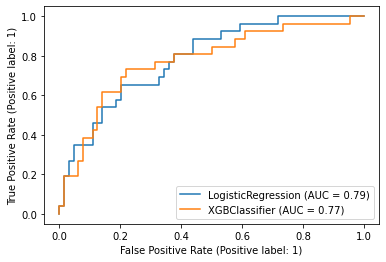

In [269]:
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr_, X_test_, y_test_, ax=ax)
plot_roc_curve(model_xgb_, X_test_, y_test_, ax=ax)